<a href="https://colab.research.google.com/github/SaadUSheikh/AIOptimizationforSocialmedia/blob/main/Word2VecEmbeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
!pip install gensim

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import nltk

from gensim.models import Word2Vec

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
    classification_report, confusion_matrix, ConfusionMatrixDisplay

In [61]:
labels = []
tokens = []

x = []
y = []

In [62]:
corpus = [
    "Red apples are a favorite in the spring.",
    "The blue sky makes me happy in the summer.",
    "Green salads are perfect for a calm fall day.",
    "Yellow chocolate is a delightful winter treat.",
    "Purple flowers bloom in the spring.",
    "I am happy when it rains.",
    "Orange tea is soothing in the winter.",
    "The sun makes me excited.",
    "I feel calm when it snows.",
    "I am confused when it's cloudy.",
    "Surprised by the pink sunset.",
    "Coffee in the morning makes me happy."
]

corpus

['Red apples are a favorite in the spring.',
 'The blue sky makes me happy in the summer.',
 'Green salads are perfect for a calm fall day.',
 'Yellow chocolate is a delightful winter treat.',
 'Purple flowers bloom in the spring.',
 'I am happy when it rains.',
 'Orange tea is soothing in the winter.',
 'The sun makes me excited.',
 'I feel calm when it snows.',
 "I am confused when it's cloudy.",
 'Surprised by the pink sunset.',
 'Coffee in the morning makes me happy.']

In [63]:
# Download the 'stopwords' dataset
nltk.download('stopwords')

stopwords = set(stopwords.words('english'))

stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [64]:
def remove_stopwords(sentence):
    words = nltk.word_tokenize(sentence)

    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stopwords]

    return words

In [65]:
nltk.download('punkt_tab')
tokenized_corpus = [remove_stopwords(sentence) for sentence in corpus]

tokenized_corpus[0]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['red', 'apples', 'favorite', 'spring']

https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92

- vector_size: The number of dimensions of the embeddings and the default is 100.
- window: The maximum distance between a target word and words around the target word. The default window is 5.
- min_count: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
- workers: It defines the number of CPU cores to use for training. Setting it to -1 will use all available cores.
- sg: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

In [66]:
model = Word2Vec(
    sentences = tokenized_corpus,
    vector_size = 100, window=5,
    min_count=1, workers=-1
)

model

In [67]:
for word in model.wv.key_to_index:
    tokens.append(model.wv[word])

    labels.append(word)

In [68]:
print(labels)

['makes', 'happy', 'winter', 'spring', 'calm', 'salads', 'chocolate', 'yellow', 'day', 'fall', 'perfect', 'summer', 'green', 'coffee', 'sky', 'blue', 'favorite', 'apples', 'delightful', 'morning', 'treat', 'purple', 'sunset', 'pink', 'surprised', 'cloudy', 'confused', 'snows', 'feel', 'excited', 'sun', 'soothing', 'tea', 'orange', 'rains', 'bloom', 'flowers', 'red']


In [69]:
tokens = np.array(tokens)

print(tokens)

[[-5.3622725e-04  2.3643136e-04  5.1033497e-03 ... -7.0415605e-03
   9.0145587e-04  6.3925339e-03]
 [-8.6196875e-03  3.6657380e-03  5.1898835e-03 ... -2.3915148e-03
  -9.5100943e-03  4.5058788e-03]
 [ 9.4563962e-05  3.0773198e-03 -6.8126451e-03 ...  5.1259040e-04
   8.2130842e-03 -7.0190406e-03]
 ...
 [ 7.9434970e-03 -6.4516068e-03  5.7945312e-03 ...  8.3017135e-03
  -3.5923254e-03 -9.8455455e-03]
 [ 5.3829267e-03  9.8106898e-03 -7.0547746e-03 ...  8.8351145e-03
  -9.4265700e-04 -8.0324174e-04]
 [ 2.2270130e-03 -7.5334953e-03  5.6283558e-03 ...  3.9910283e-03
  -7.2031878e-03 -2.1236371e-03]]


In [70]:
tsne_model = TSNE(n_components=2, random_state=42)

tsne_model

TSNE(random_state=42)

In [71]:
new_values = tsne_model.fit_transform(tokens)

new_values

array([[-2.068716  ,  1.9175961 ],
       [-0.75710434,  2.1861384 ],
       [-1.8270241 ,  2.1118891 ],
       [-1.2629205 ,  2.750838  ],
       [-1.5162688 ,  1.2135847 ],
       [-1.9462651 ,  2.9086752 ],
       [-1.7367945 ,  1.46636   ],
       [-1.2380589 ,  1.9026241 ],
       [-2.0029614 ,  2.5125184 ],
       [-2.0981095 ,  1.8479631 ],
       [-1.1929202 ,  1.9409835 ],
       [-1.5565426 ,  2.18526   ],
       [-1.4439186 ,  1.3242981 ],
       [-1.0134692 ,  1.1877427 ],
       [-0.96683776,  2.578158  ],
       [-0.3584426 ,  2.0156639 ],
       [-2.3506303 ,  1.6577874 ],
       [-0.97344476,  2.6163743 ],
       [-1.4127327 ,  2.1107068 ],
       [-1.3753172 ,  1.8949319 ],
       [-1.6933224 ,  2.305663  ],
       [-1.2630149 ,  1.3249094 ],
       [-0.66063046,  1.8613721 ],
       [-0.6740598 ,  1.538005  ],
       [-0.88666457,  2.587021  ],
       [-1.3128192 ,  1.1740285 ],
       [-1.5884682 ,  1.3293535 ],
       [-2.0113542 ,  2.5252898 ],
       [-2.1430492 ,

In [72]:
for value in new_values:
    x.append(value[0])
    y.append(value[1])

In [73]:
print(f'x: {x}', f'y: {y}', sep='\n\n')

x: [-2.068716, -0.75710434, -1.8270241, -1.2629205, -1.5162688, -1.9462651, -1.7367945, -1.2380589, -2.0029614, -2.0981095, -1.1929202, -1.5565426, -1.4439186, -1.0134692, -0.96683776, -0.3584426, -2.3506303, -0.97344476, -1.4127327, -1.3753172, -1.6933224, -1.2630149, -0.66063046, -0.6740598, -0.88666457, -1.3128192, -1.5884682, -2.0113542, -2.1430492, -0.95054126, -1.6980954, -0.54203326, -1.9623249, -2.3089163, -1.5329528, -1.7349261, -1.5425587, -1.5530728]

y: [1.9175961, 2.1861384, 2.1118891, 2.750838, 1.2135847, 2.9086752, 1.46636, 1.9026241, 2.5125184, 1.8479631, 1.9409835, 2.18526, 1.3242981, 1.1877427, 2.578158, 2.0156639, 1.6577874, 2.6163743, 2.1107068, 1.8949319, 2.305663, 1.3249094, 1.8613721, 1.538005, 2.587021, 1.1740285, 1.3293535, 2.5252898, 1.4018815, 1.7483975, 2.397734, 1.7515965, 1.7357222, 1.6728941, 2.2569814, 1.7819989, 2.6973405, 1.5023743]


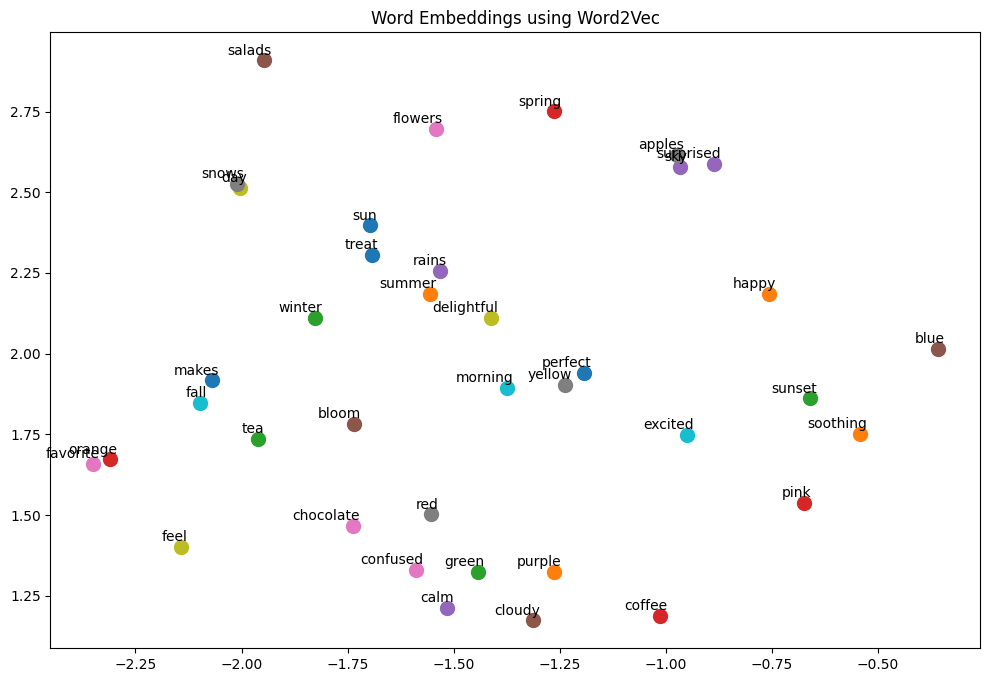

In [74]:
plt.figure(figsize=(12, 8))

plt.title('Word Embeddings using Word2Vec')

for i in range(len(x)):
    plt.scatter(x[i], y[i], s=100)

    plt.annotate(
        labels[i],
        xy=(x[i], y[i]),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom'
    )

plt.show()

In [75]:
model.wv.most_similar('summer', topn=5)

[('sun', 0.18189512193202972),
 ('winter', 0.17272792756557465),
 ('salads', 0.16694682836532593),
 ('tea', 0.15600773692131042),
 ('delightful', 0.13264630734920502)]

In [76]:
model.wv.most_similar('spring', topn=5)

[('sky', 0.17826788127422333),
 ('flowers', 0.16390635073184967),
 ('salads', 0.13149002194404602),
 ('day', 0.07497557997703552),
 ('happy', 0.06797593086957932)]

In [77]:
model.wv.most_similar('blue', topn=5)

[('sunset', 0.19613032042980194),
 ('soothing', 0.15878427028656006),
 ('happy', 0.12300864607095718),
 ('rains', 0.10277824103832245),
 ('pink', 0.08300335705280304)]

- If the words are highly similar, the similarity score will be close to 1.
- If the words are dissimilar, the similarity score will be close to -1.
- If the words have no apparent similarity, the score will be close to 0.

In [78]:
model.wv.similarity('sun', 'summer')

0.18189514

In [79]:
model.wv.similarity('salads', 'surprised')

0.042779144

In [80]:
model.wv.similarity('sun', 'snows')

0.142399

In [81]:
model.wv.similarity('blue', 'red')

-0.07998557

In [82]:
model.wv.similarity('blue', 'happy')

0.12300865

In [83]:
model.wv.doesnt_match(['yellow', 'blue', 'salads'])

'salads'

In [84]:
model.wv.doesnt_match(['spring', 'snows', 'summer'])

'snows'

In [85]:
df = pd.read_csv("cleaned_reviews.csv")

df.head(10)

,text,label
0,product is good but price is to high after pur...,2
1,not gudpoor cloth,0
2,did not show correct reading even once,0
3,4 star for short power chord thanks flipkart f...,2
4,issue is mop road rotatingits off worst qualit...,0
5,product it is not very good not perfectly join...,1
6,very cheap quality damaged pieces waste of money,0
7,this product its good but so lightweight not o...,0
8,product so very good quality but delivered to ...,1
9,it gave negative result in covid test but when...,0


In [86]:
x_train, x_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((13896,), (13896,), (3474,), (3474,))

In [87]:
word2vec_model = Word2Vec(
    sentences=[document.split() for document in x_train],
    vector_size=100, window=5,
    min_count=5, workers=4
)

word2vec_model

In [88]:
def document_vectorizer(document, model):
    words = document.split()

    word_vectors = [model.wv[word] for word in words if word in model.wv]

    if len(word_vectors) == 0:
        return np.zeros(100)

    word_vectors = np.array(word_vectors)

    return word_vectors.mean(axis=0)

In [89]:
clf = GaussianNB()

clf

GaussianNB()

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

text_clf = Pipeline([
    ('word_embeddings', FunctionTransformer(
        lambda x: np.array([document_vectorizer(doc, word2vec_model) for doc in x]))),
    ('classifier', clf)
])

text_clf

Pipeline(steps=[('word_embeddings',
                 FunctionTransformer(func=<function <lambda> at 0x7cd10c6cfd80>)),
                ('classifier', GaussianNB())])

In [91]:
text_clf.fit(x_train, y_train)

Pipeline(steps=[('word_embeddings',
                 FunctionTransformer(func=<function <lambda> at 0x7cd10c6cfd80>)),
                ('classifier', GaussianNB())])

In [92]:
y_pred = text_clf.predict(x_test)

y_pred

array([2, 0, 0, ..., 2, 2, 0])

In [93]:
def summarize_classification(y_test, y_pred):

    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print("Length of testing data: ", len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("precision_score : " , prec)
    print("recall_score : ", recall)

In [94]:
summarize_classification(y_test, y_pred)

Length of testing data:  3474
accuracy_count :  2042.0
accuracy_score :  0.5877950489349453
precision_score :  0.5910007710305206
recall_score :  0.5877950489349453


In [95]:
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.64      0.49      0.56      1168
           1       0.55      0.52      0.53      1184
           2       0.59      0.76      0.66      1122

    accuracy                           0.59      3474
   macro avg       0.59      0.59      0.58      3474
weighted avg       0.59      0.59      0.58      3474



https://www.himandthyme.com/understanding-and-visualizing-word-embeddings-with-glove-and-word2vec/

In [96]:
from sklearn.manifold import TSNE

def visualize_embeddings(embeddings, words):
    tsne = TSNE(n_components=2, random_state=0, perplexity = len(words) - 1)

    embedding_vectors = np.array([embeddings[word] for word in words])

    two_d_embeddings = tsne.fit_transform(embedding_vectors)

    plt.figure(figsize=(12, 8))

    for i, word in enumerate(words):
        x, y = two_d_embeddings[i, :]
        plt.scatter(x, y)
        plt.annotate(
            word, (x, y), xytext=(5, 2),
            textcoords="offset points", ha="right", va="bottom"
        )
    plt.show()

##### We cannot see the words clearly so we will see using 3D visualization

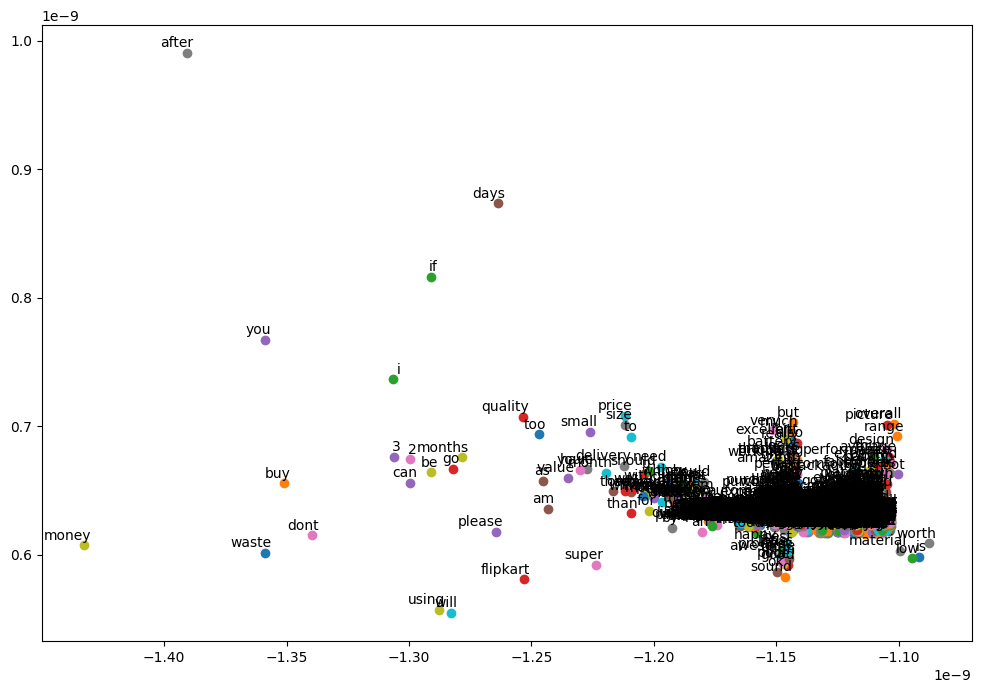

In [97]:
word2vec_words = word2vec_model.wv.index_to_key

visualize_embeddings(word2vec_model.wv, word2vec_words)

In [98]:
import plotly.express as px

def visualize_embeddings_3d(embeddings, words):
    tsne = TSNE(n_components=3, random_state=0, perplexity=len(words)-1)
    embedding_vectors = np.array([embeddings[word] for word in words])
    three_d_embeddings = tsne.fit_transform(embedding_vectors)

    fig = px.scatter_3d(
        x=three_d_embeddings[:, 0],
        y=three_d_embeddings[:, 1],
        z=three_d_embeddings[:, 2],
        text=words,
        title="3D Interactive Embedding Visualization",
        labels={'x': 'Dimension 1', 'y': 'Dimension 2', 'z': 'Dimension 3'},
    )

    fig.update_traces(marker=dict(size=5))

    fig.show()

### TODO Recording:

- Please zoom into the plot so you can see more detail
- Then pan till you see at least some similar words close to each other in space

In [99]:
word2vec_words = word2vec_model.wv.index_to_key

visualize_embeddings_3d(word2vec_model.wv, word2vec_words)

In [100]:
from sklearn.metrics.pairwise import cosine_similarity

def get_similarity_scores(word, model):
    print(f"Similarity scores for the word '{word}':")

    word_vector = model.wv[word].reshape(1, -1)

    similarities = cosine_similarity(word_vector, model.wv.vectors)

    similarity_df = pd.DataFrame({
        'word': model.wv.index_to_key,
        'similarity_score': similarities[0]
    })

    sorted_similarity_df = similarity_df.sort_values(by='similarity_score', ascending=False)

    return sorted_similarity_df

In [101]:
similarity_scores_df = get_similarity_scores('sad', word2vec_model)

similarity_scores_df.head(10)

Similarity scores for the word 'sad':


,word,similarity_score
1235,sad,1.000000
347,fully,0.980513
577,iam,0.978829
1683,unhappy,0.976997
1079,worest,0.975144
756,hate,0.975064
390,bed,0.974884
1640,cart,0.974054
132,item,0.972579
772,wrost,0.972297


In [102]:
similarity_scores_df = get_similarity_scores('happy', word2vec_model)

similarity_scores_df.head(10)

Similarity scores for the word 'happy':


,word,similarity_score
74,happy,1.000000
125,satisfied,0.942150
70,really,0.877253
1543,impressed,0.872278
152,love,0.870254
65,am,0.868142
108,thanks,0.863207
2,product,0.859284
189,im,0.853251
118,amazing,0.847837


In [103]:
similarity_scores_df = get_similarity_scores('day', word2vec_model)

similarity_scores_df.head(10)

Similarity scores for the word 'day':


,word,similarity_score
115,day,1.000000
46,time,0.977280
134,first,0.968834
485,weeks,0.965855
35,on,0.965700
130,now,0.964396
247,done,0.963308
199,4,0.960206
170,within,0.959814
220,last,0.959805


In [104]:
similarity_scores_df = get_similarity_scores('summer', word2vec_model)

similarity_scores_df.head(10)

Similarity scores for the word 'summer':


,word,similarity_score
1598,summer,1.000000
1237,flat,0.993684
718,cooking,0.993498
1001,hence,0.993209
1036,rupees,0.993058
196,full,0.992962
393,100,0.992889
1347,cold,0.992787
1240,150,0.992771
860,solution,0.992763
